# Simulating Geometric Brownian Motion (GBM) in Python

<b> YouTube Tutorial </b> (Published:
Sep 15, 2021): https://youtu.be/jejjUPfaIXY

In this tutorial we will be simulating Geometric Brownian Motion in Python.

Geometric Brownian motion (GBM) S is defined by S0 > 0 and the dynamics as defined in the following Stochastic Differential Equation (SDE):


$\Large dS_t = \mu S_t dt + \sigma S_t dW_t$

Integrated Form:

 - $\log S_t = \log S_0 + \int_{0}^{t} (\mu-\frac{\sigma^2}{2}) \,ds + \int_{0}^{t} \sigma \,dW_s $

 - $\log S_t = \log S_0 + (\mu-\frac{\sigma^2}{2})t + \sigma W_t $

 - $\log S_t \sim N(\log S_0 + (\mu-\frac{\sigma^2}{2})t, \sigma^2 t)$

Explicit Expression:

$\Large S_t = S_0 {\rm e}^{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [ ]:
# drift coefficent
mu = 0.1
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.3

### Simulating GBM Paths

We have two options here, we can either:
- (like here) simulate the stock price directly throughout the simulation and multiple the exponential terms together at each time step; or
- we can simulate the log normal distribution and cumulatively add the terms along each sample path

In [ ]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

### Consider time intervals in years

In [ ]:
# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

### Plotting Results

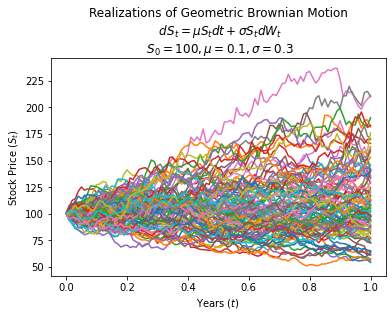

In [ ]:
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()